# Phase 1: EDA & Data Pre-processing 

**Author: Shreya Das**

In this notebook we will be exploring a dataset from kaggle (https://www.kaggle.com/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images), that includes histological images of colon and lung cancer. Our goal is to build a CNN model to be able to identify the different histological classes and determine the type of cancer. This dataset has 5 classes: Colon Adenocarcinoma, Colon Benign Tissue, Lung Adenocarcinoma, Lung Benign Tissue, and Lung Squamous Cell Carcinoma. Because this has 5 classes, this is a bit more complex than the binary classification case.

In this first phase we will be exploring the dataset and then, preform data pre-processing to make it more accessible for the CNN model that we will build in the next phase.

Original Paper: Borkowski AA, Bui MM, Thomas LB, Wilson CP, DeLand LA, Mastorides SM. Lung and Colon Cancer Histopathological Image Dataset (LC25000). arXiv:1912.12142v1 [eess.IV], 2019

## 0 Creating a Virtual Environment
Using a virtual environment helps containerize all the dependencies and libraries requires for this notebook. Installing the dependencies in a virtual environment means that these dependencies will not be downloaded in your local device.

In [43]:
# Create the virtual environment using terminal in VS code. If you aren't using VS code, locate the terminal in your coding environment. Here the virtual environment is name env
# !python -m venv env 

In [44]:
# Activate the virtual environment. Once the virtual environment is activated, in terminal you should see (env) at the beginning of the current line in terminal
# !source env/bin/activate

## 1.0 Exploratory Data Analysis
First we are going to explore the dataset a little further. Since this is a image based dataset, EDA is a little different from most numerical-based datasets. 

### 1.1 Exploring Number of images per Diagnosis Class

One of the important things to do is understand how many images we have in each class. To do this, we will create a dictionary with the class name as a key and the number of images in each image class as the value.

First we need to download some other dependencies like os.

In [45]:
import os

In [46]:
# Define a dictionary with the keys and image paths for each image class
diagnosis = {
    'Colon adenocarcinoma': len(os.listdir('data/colon_aca')),
    'Colon benign tissue': len(os.listdir('data/colon_n')),
    'Lung adenocarcinoma': len(os.listdir('data/lung_aca')),
    'Lung benign tissue': len(os.listdir('data/lung_n')),
    'Lung squamous cell carcinoma': len(os.listdir('data/lung_scc'))
}

We will now use a barplot to display the number of images per class.

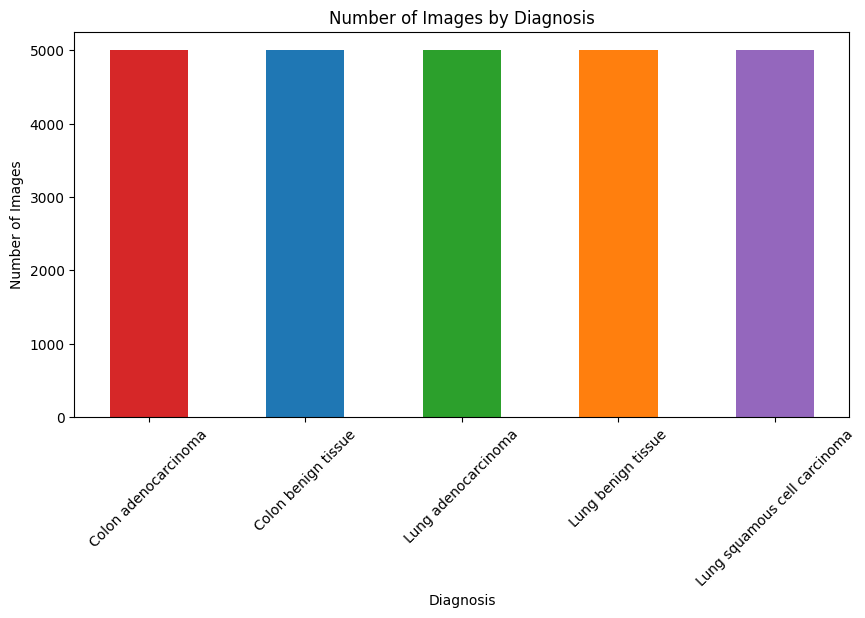

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10,5))
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple']

# Create a bar plot with each bar representing a different image class
plt.bar(diagnosis.keys(), diagnosis.values(), width = .5, color = bar_colors)
plt.title("Number of Images by Diagnosis")
plt.xlabel('Diagnosis')
plt.xticks(rotation = 45)
plt.ylabel('Number of Images')

# Save the figure and then show the figure
plt.savefig('EDA_graph')
plt.show()

Interestingly enough, all classes have 5000 images. This is good since we know that there will be no imbalance in the data for each class. This reduces the chance of bias in the CNN model.

### 1.2 Checking Image Sizes

Next we are going to check the image sizes. When doing image classifier based CNNs, we need to make sure all the images in our dataset have the same size to ensure efficient calculations by the NNs. 

We will plot the height and width of the images in a scatter plot. First we grab the height and width of the images using a function that we define get_dims() (we will use the same dictionary as above). 

In [48]:
# Install Pillow in terminal
%pip install pillow


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


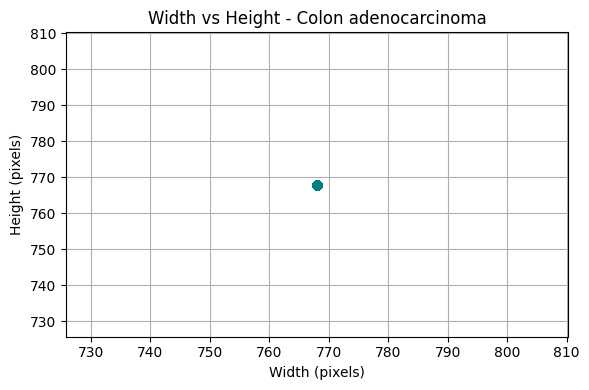

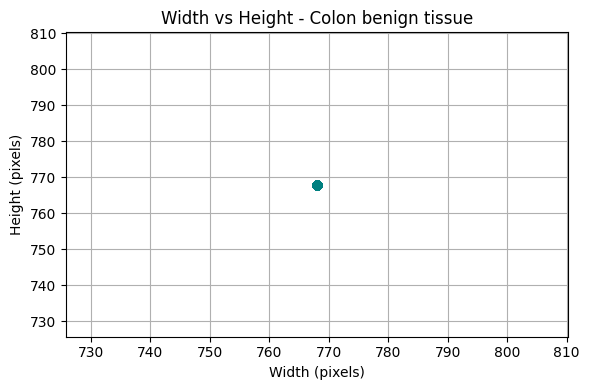

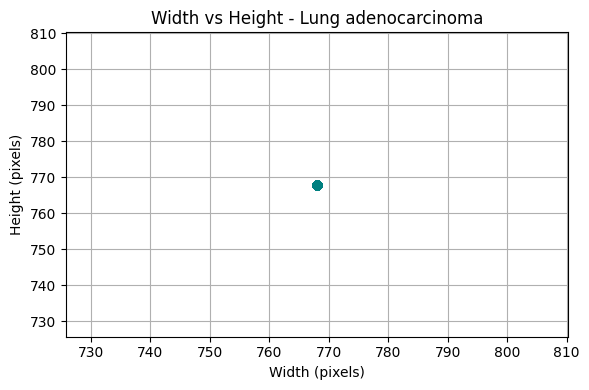

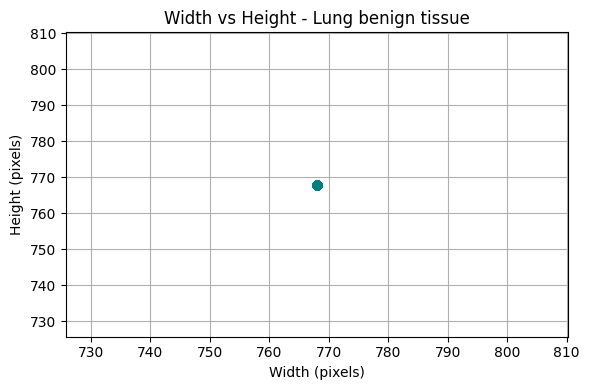

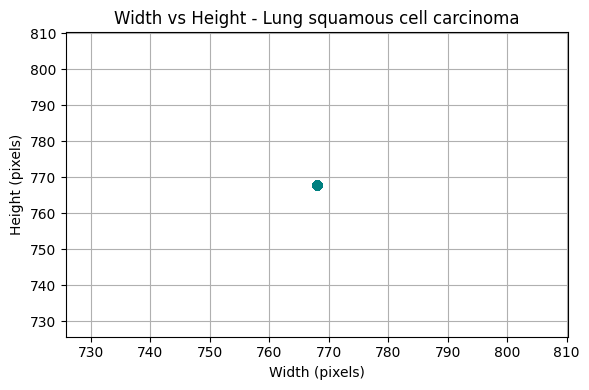

In [49]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define paths for each image class
image_paths = {
    'Colon adenocarcinoma': 'data/colon_aca',
    'Colon benign tissue': 'data/colon_n',
    'Lung adenocarcinoma': 'data/lung_aca',
    'Lung benign tissue': 'data/lung_n',
    'Lung squamous cell carcinoma': 'data/lung_scc'
}

# Store image sizes for each class
image_sizes = {label: [] for label in image_paths}

# Collect width and height for each image
for label, path in image_paths.items():
    for filename in os.listdir(path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp')):
            img_path = os.path.join(path, filename)
            with Image.open(img_path) as img:
                width, height = img.size
                image_sizes[label].append((width, height))

# Plotting each class in a separate scatter plot and then save each plot
for label, sizes in image_sizes.items():
    if sizes:
        widths, heights = zip(*sizes)
        plt.figure(figsize=(6, 4))
        plt.scatter(widths, heights, alpha=0.6, color='teal')
        plt.title(f'Width vs Height - {label}')
        plt.xlabel('Width (pixels)')
        plt.ylabel('Height (pixels)')
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f'Width vs Height - {label}')
        plt.show()

Interestingly enough, we see that all the images have the same respective height and width. 
### 1.3 Displaying the Images
To see the exact height and width we can execute the following code (while also displaying the image):

In [50]:
# Install opencv library using terminal
%pip install opencv-python

import cv2


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [51]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define a function to grab the image, display it, and then print the dimensions of the shape
def display_img(file):

    # Grabing the image using the file path provided as a parameter to the function
    img = cv2.imread(os.path.join(file))

    # Display the image in color
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

    # Print the image shape in pixels and tell us if it is a colored image
    print(img.shape)

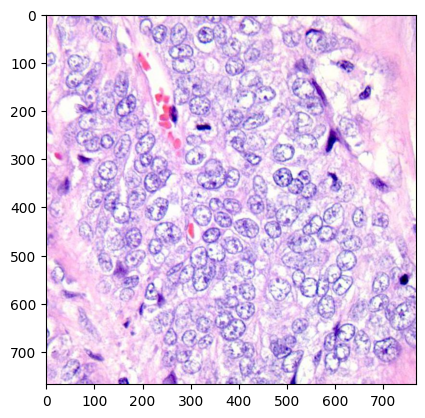

(768, 768, 3)


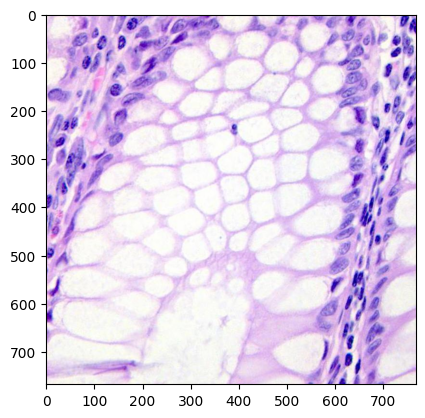

(768, 768, 3)


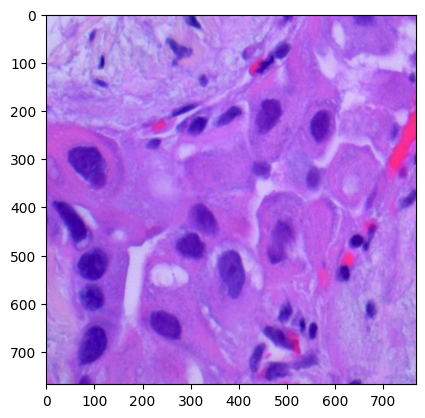

(768, 768, 3)


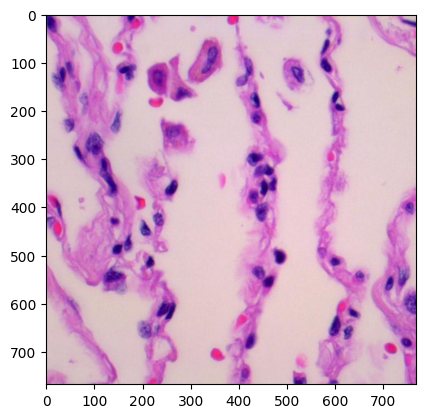

(768, 768, 3)


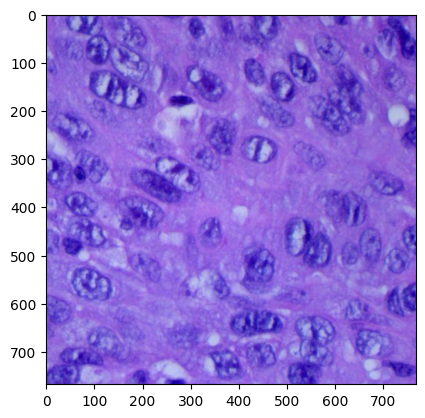

(768, 768, 3)


In [52]:
display_img('data/colon_aca/colonca1.jpeg')
display_img('data/colon_n/colonn1.jpeg')
display_img('data/lung_aca/lungaca1.jpeg')
display_img('data/lung_n/lungn1.jpeg')
display_img('data/lung_scc/lungscc1.jpeg')

All of the images in the dataset are 768 by 768 pixels. Note, the 3 in the shape of the image tells us that these are colored images.

## 2.0 Data Pre-processing

Fortunately, in our case we don't have a lot of data pre-processing to do for our dataset. There are a couple of things that we should do including labeling the data based on the diagnosis class and scaling the images from 0-767 to 0-1. We also don't have to remove any dodgy images since all the images in our dataset have .jpeg extension, so we can skip this step. 

### 2.1 Load Data
We are